In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import tensorflow as tf
import networkx as nx
# import cartopy.crs as ccrs
# import cartopy
import random
import stellargraph as sg
from stellargraph.layer import GCN_LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import Sequential, Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv("CatalogoChile2000_2022T.csv")

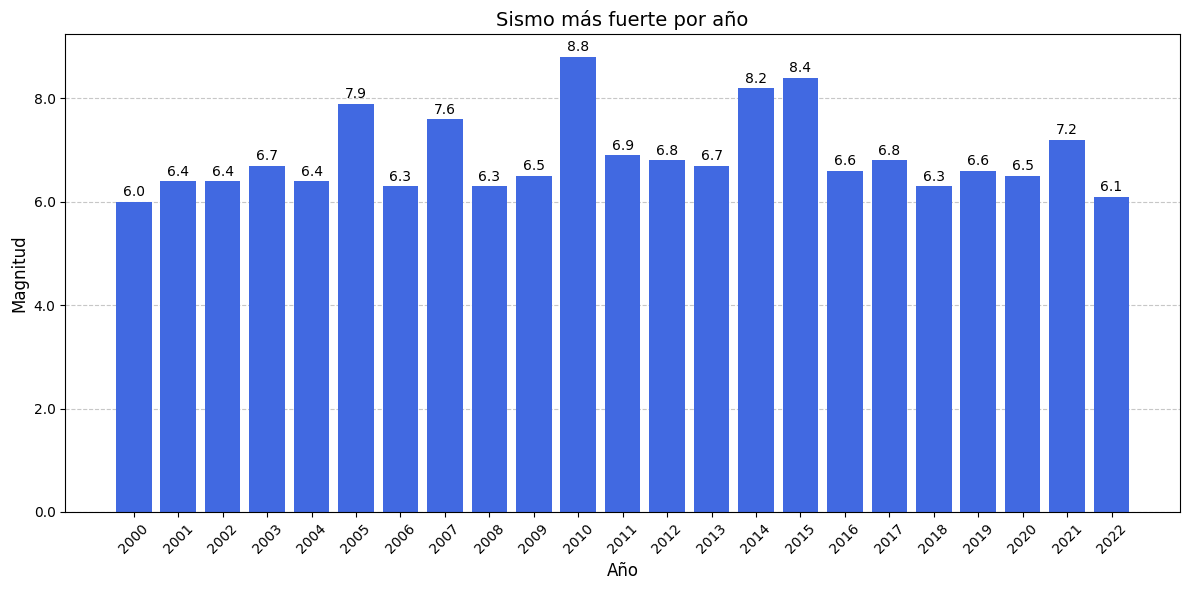

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Cargar el dataset
df = pd.read_csv("CatalogoChile2000_2022T.csv")

# Convertir la columna `year` a tipo entero si no lo es
df['year'] = df['year'].astype(int)

# Encontrar la magnitud más fuerte por año
strongest_magnitude = df.groupby('year')['magn1'].max().reset_index()

# Graficar
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Obtener el eje actual

# Graficar las barras
bars = ax.bar(strongest_magnitude['year'], strongest_magnitude['magn1'], color='royalblue', alpha=1)

# Configurar eje X
ax.set_xticks(strongest_magnitude['year'])
ax.set_xticklabels(strongest_magnitude['year'], rotation=45, fontsize=10)

# Configurar eje Y
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))  # Mostrar un decimal

# Configurar el grid
ax.set_axisbelow(True)  # Colocar el grid detrás de las barras
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()  # Obtener la altura de cada barra
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Coordenada X: centro de la barra
        height + 0.05,  # Coordenada Y: ligeramente arriba de la barra
        f'{height:.1f}',  # Texto con 1 decimal
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Personalizar el gráfico
plt.title('Sismo más fuerte por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



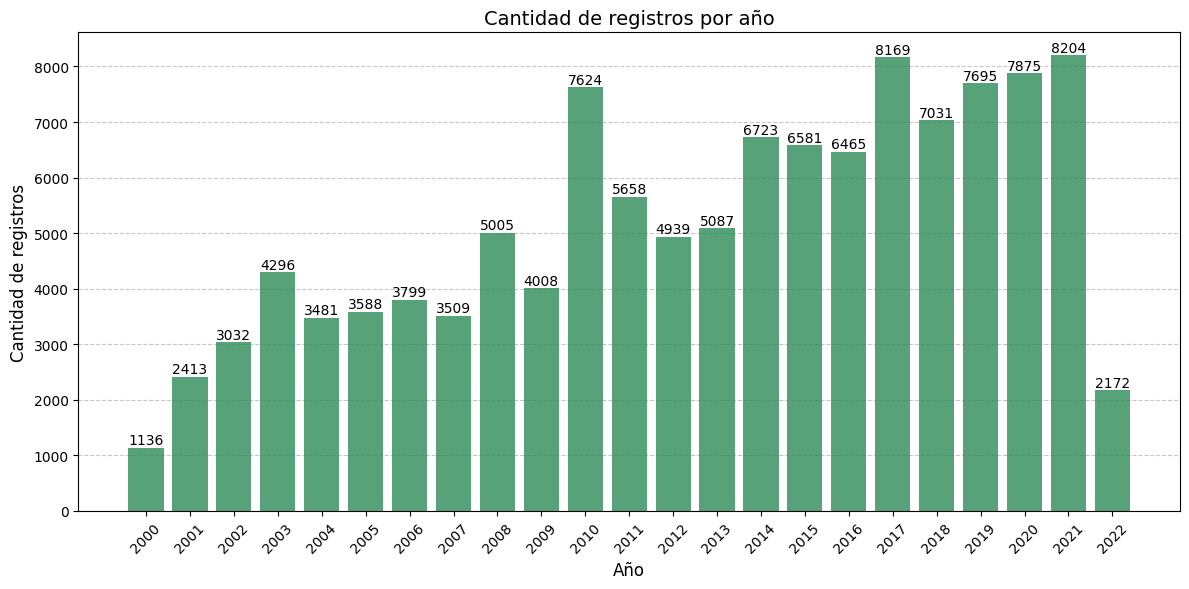

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("CatalogoChile2000_2022T.csv")

# Convertir la columna `year` a tipo entero si no lo es
df['year'] = df['year'].astype(int)

# Contar la cantidad de registros por año
records_per_year = df.groupby('year').size().reset_index(name='count')

# Graficar
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Obtener el eje actual

# Graficar las barras
bars = ax.bar(records_per_year['year'], records_per_year['count'], color='seagreen', alpha=0.8)

# Configurar eje X
ax.set_xticks(records_per_year['year'])
ax.set_xticklabels(records_per_year['year'], rotation=45, fontsize=10)

# Configurar eje Y
ax.set_ylabel('Cantidad de registros', fontsize=12)

# Añadir etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()  # Obtener la altura de cada barra
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Coordenada X: centro de la barra
        height + 10,  # Coordenada Y: ligeramente arriba de la barra
        f'{height}',  # Texto con el conteo
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Personalizar el gráfico
plt.title('Cantidad de registros por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # Colocar el grid detrás de las barras

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [5]:
dataset

,Unnamed: 0,X,year,month,day,hour,minute,second,lat,long,z,magn1,time
0,1,1,2000,1,2,3,42,12.7,-33.410,-70.880,81.9,2.5,1.154314
1,2,2,2000,1,2,5,3,13.1,-33.787,-71.339,45.8,3.7,1.210568
2,3,3,2000,1,2,18,55,55.0,-31.535,-71.318,35.7,3.8,1.788831
3,4,4,2000,1,2,19,36,25.8,-32.446,-70.923,95.2,2.7,1.816965
4,5,5,2000,1,3,2,41,41.7,-32.986,-71.348,41.8,3.6,2.112288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118485,118486,118486,2022,3,22,19,20,19.0,-22.327,-68.675,105.3,2.9,8116.805775
118486,118487,118487,2022,3,22,19,27,56.0,-29.196,-71.287,40.0,3.9,8116.811065
118487,118488,118488,2022,3,22,21,29,45.0,-23.842,-66.729,237.0,4.9,8116.895660
118488,118489,118489,2022,3,22,21,54,34.0,-21.200,-69.538,71.8,2.5,8116.912894


In [6]:
dataset.describe()

,Unnamed: 0,X,year,month,day,hour,minute,second,lat,long,z,magn1,time
count,118490.000000,118490.000000,118490.000000,118490.000000,118490.000000,118490.000000,118490.000000,118490.000000,118490.000000,118490.000000,118490.000000,118490.000000,118490.000000
mean,59245.500000,59245.500000,2012.879197,6.506051,15.716406,11.296270,29.399789,29.882312,-28.514213,-70.444113,74.558158,3.218910,4886.597610
std,34205.261035,34205.261035,5.957438,3.488368,8.828909,6.917155,17.311959,17.305463,6.370703,1.835098,58.881487,0.667083,2174.893556
min,1.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-65.399000,-113.233000,0.000000,1.100000,1.154314
25%,29623.250000,29623.250000,2008.000000,3.000000,8.000000,5.000000,14.000000,15.000000,-33.147000,-71.714000,29.500000,2.700000,3246.283955
50%,59245.500000,59245.500000,2014.000000,6.000000,16.000000,11.000000,29.000000,30.000000,-30.366000,-70.605000,53.200000,3.100000,5197.156464
75%,88867.750000,88867.750000,2018.000000,10.000000,23.000000,17.000000,44.000000,45.000000,-22.185000,-69.076000,110.600000,3.600000,6740.609612
max,118490.000000,118490.000000,2022.000000,12.000000,31.000000,23.000000,59.000000,60.000000,-13.736000,-55.197000,639.300000,8.800000,8116.969861


In [7]:
## CODIGO PARA COMPROBAR SI EXISTEN DATOS N/A
na = 0
for columna in dataset.columns:
  i=0
  for i in range(118489):
    if (pd.isna(dataset[columna][i])) is True:
      na = na+1
print('Total de datos:', len(dataset))
print('Cantidad de datos N/A:', na)

Total de datos: 118490
Cantidad de datos N/A: 0


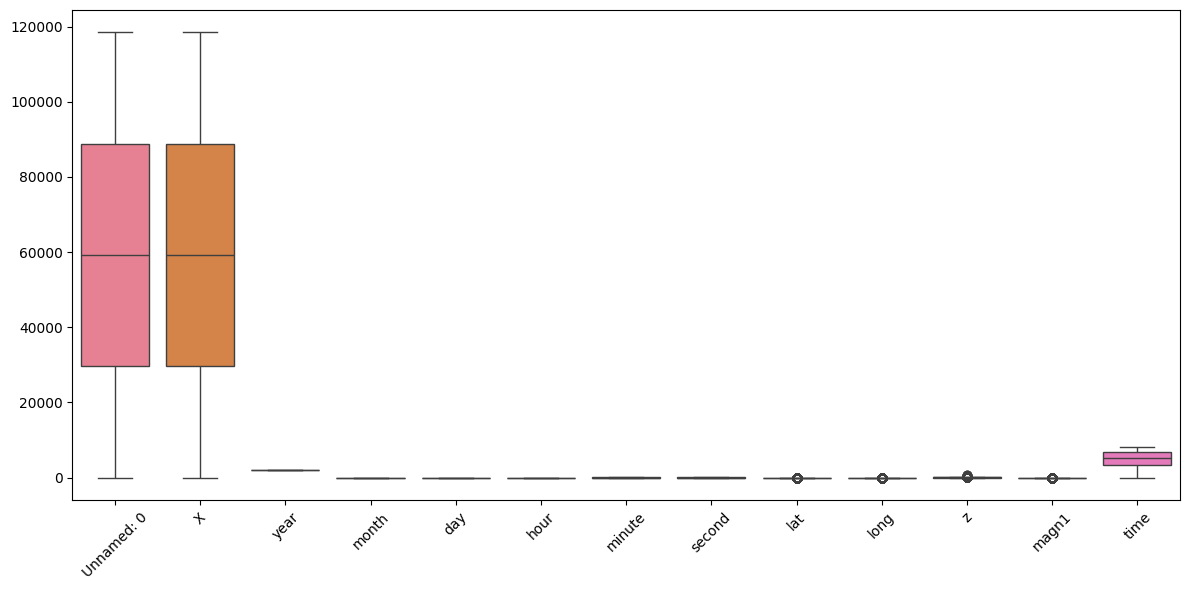

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Se puede ver que en lat, long, z y magn1 existen datos atípicos.

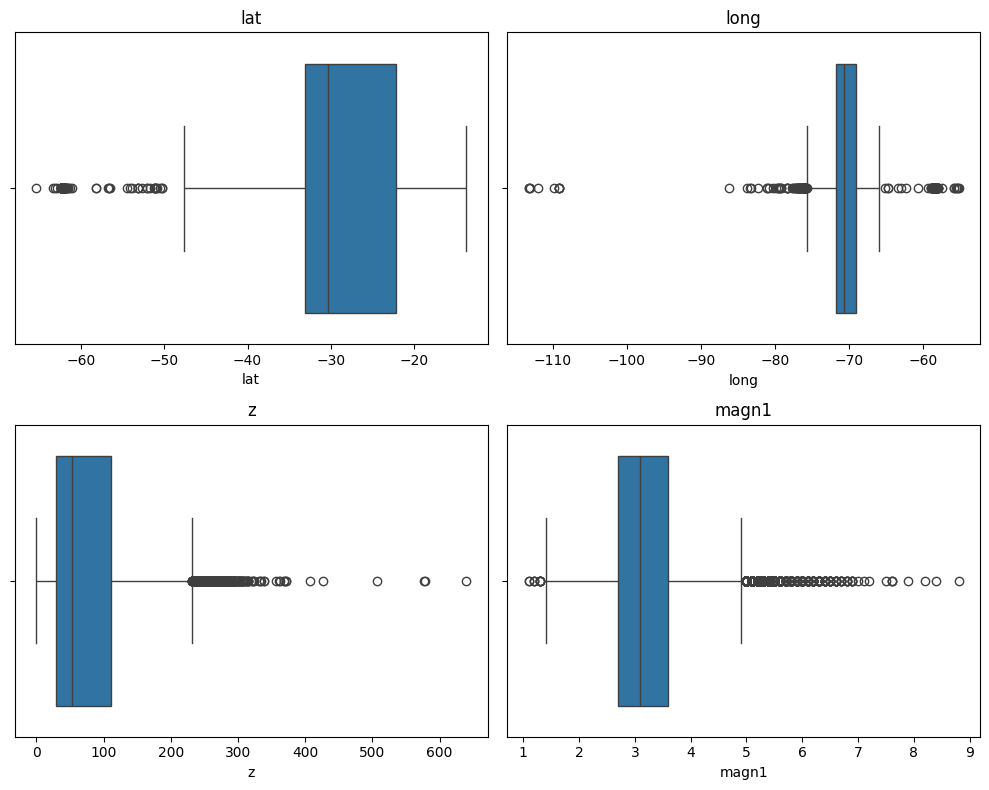

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.boxplot(x=dataset['lat'], ax=axes[0, 0])
axes[0, 0].set_title('lat')

sns.boxplot(x=dataset['long'], ax=axes[0, 1])
axes[0, 1].set_title('long')

sns.boxplot(x=dataset['z'], ax=axes[1, 0])
axes[1, 0].set_title('z')

sns.boxplot(x=dataset['magn1'], ax=axes[1, 1])
axes[1, 1].set_title('magn1')

plt.tight_layout()
plt.show()

### Para la variable de latitud y longitud, se puede interpretar que los datos atípicos corresponden a sismos en lugares poco usuales, donde no suele temblar con cierta frecuencia.
### Con la variable z es la unica de estas 4 con la que podemos descartar datos, ya que los sismos que ocurren en demasiada profundidad,son poco relevantes para la superficie en terminos de riesgo y destrucción que pudiese generar.
### Finalmente, la variable de magnitud puede ser interpretada como que sus datos atípicos corresponden a los sismos de mayor intensidad que han ocurrido en el tiempo, un ejemplo de esto es el terremoto del año 2010.


In [10]:
dataset = dataset.loc[dataset['z'] <= 70]
dataset['z'].describe()

count    66363.000000
mean        31.382240
std         16.299865
min          0.000000
25%         19.600000
50%         31.500000
75%         41.700000
max         70.000000
Name: z, dtype: float64

In [11]:
dataset.loc[(dataset['lat'] >= -60) & (dataset['lat'] <= -17)]
dataset = dataset.loc[(dataset['long'] >= -90) & (dataset['long'] <= -65)]


### Finalmente podemos ver como los datos con una profundidad mayor a 70 no se han considerado.

In [12]:
# dataset = dataset.loc[dataset['magn1'] >= 3.0]
dataset['magn1'].describe()

count    65929.000000
mean         3.191297
std          0.692410
min          1.100000
25%          2.700000
50%          3.100000
75%          3.600000
max          8.800000
Name: magn1, dtype: float64

### Ahora consideramos solamente los sismos que tengan una magnitud mayor a 3.

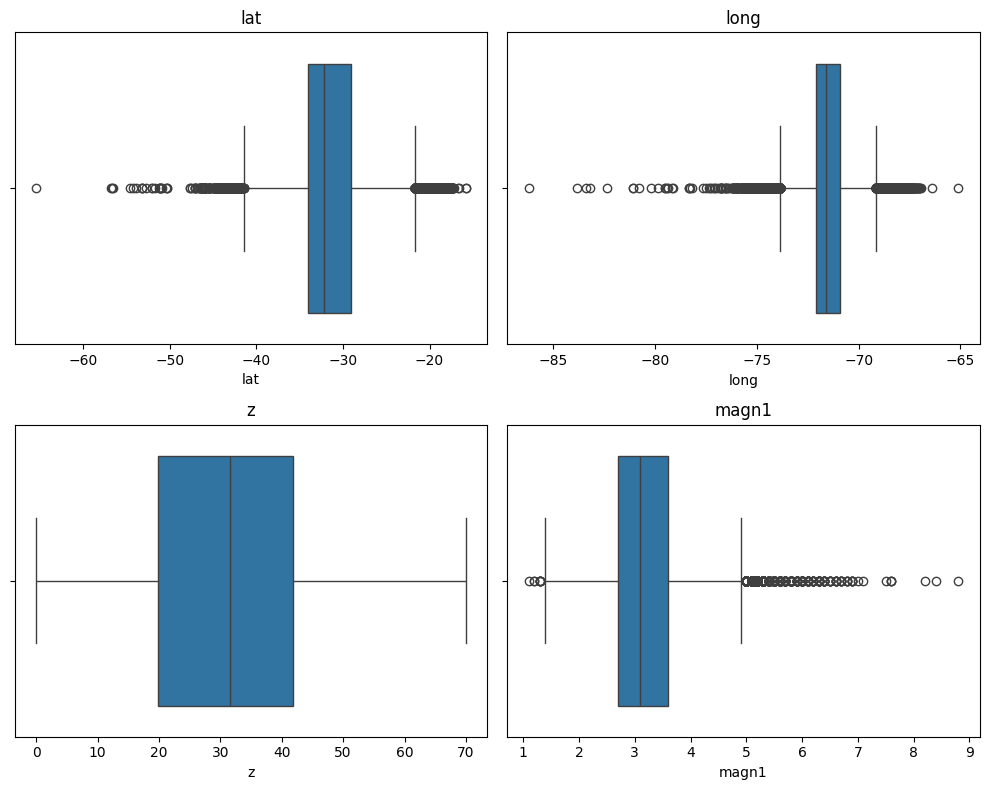

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.boxplot(x=dataset['lat'], ax=axes[0, 0])
axes[0, 0].set_title('lat')

sns.boxplot(x=dataset['long'], ax=axes[0, 1])
axes[0, 1].set_title('long')

sns.boxplot(x=dataset['z'], ax=axes[1, 0])
axes[1, 0].set_title('z')

sns.boxplot(x=dataset['magn1'], ax=axes[1, 1])
axes[1, 1].set_title('magn1')

plt.tight_layout()
plt.show()

In [14]:
X = dataset.iloc[:, list(range(11)) + list(range(12, 13))]
Y = dataset.iloc[:, 11]
X = X.values  # Si X no es un numpy array
X = X.reshape(X.shape[0], X.shape[1])
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, train_size=0.8, random_state=1)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=0.5, random_state=1)
print("Datos totales =", X.shape)
print("Train (80%) =", X_train.shape)
print("Testeo (10%) =", X_test.shape)
print("Validación (10%) =", X_valid.shape)

Datos totales = (65929, 12)
Train (80%) = (52743, 12)
Testeo (10%) = (6593, 12)
Validación (10%) = (6593, 12)


In [15]:
muestra50 = X[random.sample(range(len(X)), len(X))]
if np.any(muestra50[:, 10] > 0):
    muestra50[:, 10] *= -1  # Cambia el signo de la latitud
kmeans = KMeans(n_clusters=20, random_state=0)
coordenadas = muestra50[:, 8:10] ## lat y long, en ese orden
kmeans.fit(coordenadas)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

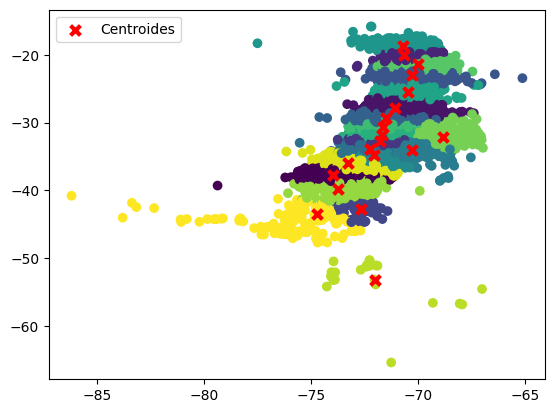

In [17]:
plt.scatter(coordenadas[:, 1], coordenadas[:, 0], c=kmeans.labels_)
plt.scatter(centroids[:,1], centroids[:,0], marker='x', s=50, linewidths=3, color='r', label='Centroides')
plt.legend(loc='best')
plt.show()

In [18]:
# %pip install git+https://github.com/VenkateshwaranB/stellargraph.git

In [19]:
# verify that we're using the correct version of StellarGraph for this notebook

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None

<div class="alert alert-block alert-danger">This notebook is designed for an older StellarGraph version 1.2.1 and may not function correctly with the newer installed version 1.3.0b. Please see: <a href="https://github.com/stellargraph/stellargraph/issues/1172">https://github.com/stellargraph/stellargraph/issues/1172</a>.</div>

C:\Users\alons\AppData\Local\Temp\ipykernel_17420\3212629744.py:4: DeprecationWarning: This notebook is designed for an older StellarGraph version 1.2.1 and may not function correctly with the newer installed version 1.3.0b. Please see: <https://github.com/stellargraph/stellargraph/issues/1172>.
  sg.utils.validate_notebook_version("1.2.1")


In [20]:
df = dataset

In [21]:
df['fecha'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
# Elimina las columnas individuales
df = df.drop(['year', 'month', 'day', 'hour', 'minute', 'second', 'Unnamed: 0', 'X'], axis=1)

In [22]:
df['fecha'] = pd.to_datetime(df['fecha'])  # Asegúrate de que la columna de fecha esté en formato datetime

df.set_index('fecha', inplace=True)

In [23]:
matriz_datos = []

for _, datos_semana in df.groupby(pd.Grouper(freq='W')): ## FRECUENCIA_PARAMETRO
    matriz_semana = datos_semana.values
    matriz_datos.append(matriz_semana)
len(matriz_datos)

1161

In [24]:
for i in range(len(matriz_datos[234])):
    print(matriz_datos[234][i][3])

4.3
3.0
2.8
4.5
2.0
2.2
2.0
2.6
3.2
4.1
4.2
2.1
2.0
2.5
3.1
2.1
2.6
4.1
2.3
3.4
4.5
3.0
2.4
2.8
4.3
3.7
4.1
2.2
3.5
2.4
2.5
3.3
4.7
3.1
3.8
3.2
2.4
1.8
2.9


In [25]:
array_3d = np.zeros((20, len(matriz_datos))) ## CAMBIAR ACÁ PARA SI SE MODIFICA NUMERO DE CENTROIDES
array_3d = np.ones_like(array_3d)
for semana in range(len(matriz_datos)):
  for dia in range(len(matriz_datos[semana])):
    # Calcular la distancia entre el dato y cada centroide
    distancias = [np.sqrt((matriz_datos[semana][dia][0] - c[0])**2 + (matriz_datos[semana][dia][1] - c[1])**2) for c in centroids]
    # Encontrar el índice del centroide más cercano
    indice_centroide_mas_cercano = np.argmin(distancias)
    if array_3d[indice_centroide_mas_cercano][semana] < matriz_datos[semana][dia][3]:
      array_3d[indice_centroide_mas_cercano][semana] = matriz_datos[semana][dia][3]
      # print("El dato se asigna al centroide más cercano:", centroids[indice_centroide_mas_cercano])
      # print("Magnitud del dato asignada al centroide más cercano:", arreglo_vacio[indice_centroide_mas_cercano][semana][0])

In [26]:
def distancia_euclidiana(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def generar_matriz_adyacencia(coordenadas):
    n = len(coordenadas)
    matriz_adyacencia = np.zeros((n, n), dtype=int)

    # Calcular las distancias y llenarlas correctamente en la matriz
    for i in range(n):
        distancias = [distancia_euclidiana(coordenadas[i], coordenadas[j]) for j in range(n)]
        
        # Excluir el nodo mismo (i) y asegurarse de no seleccionar conexiones ya establecidas
        nodos_no_conectados = [j for j in np.argsort(distancias) if j != i][:3]  # Obtener 3 nodos más cercanos

        # Establecer la conexión en la matriz de adyacencia
        matriz_adyacencia[i, nodos_no_conectados] = 1
        matriz_adyacencia[nodos_no_conectados, i] = 1  # Asegurar la simetría de la matriz

    return matriz_adyacencia


matriz_adyacencia = generar_matriz_adyacencia(centroids)
print('Distancias:')
print(distancias)
print("Matriz de Adyacencia:")
print(matriz_adyacencia)


Distancias:
[7.510686441140889, 2.8352886944909095, 10.45805026162772, 2.3621387003927086, 12.411159429056386, 7.685496463603293, 1.214663848331808, 3.4882756265347097, 4.047255895866737, 4.434972027345982, 11.731219774305988, 5.234868250430053, 1.4549203402869177, 0.5594426951815381, 9.219496388200287, 3.7579084113123162, 9.54113112869554, 22.82851040220024, 5.713118541891311, 13.407546545653512]
Matriz de Adyacencia:
[[0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 1 0 1 0 0 1 0 

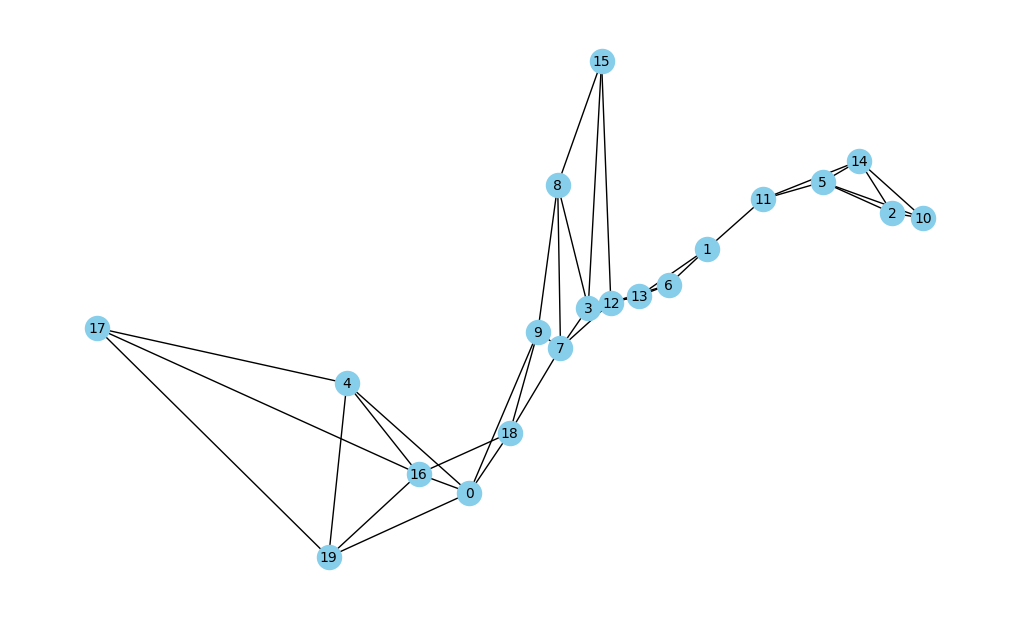

In [27]:
G = nx.from_numpy_array(matriz_adyacencia)
plt.figure(figsize=(10, 6))
nx.draw(G, pos=centroids, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_color='black')
plt.show()

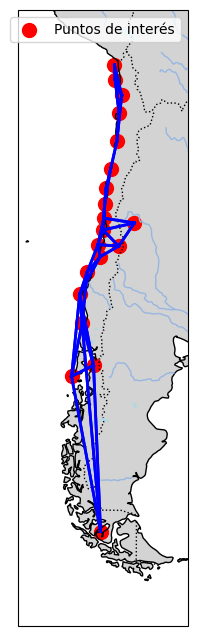

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Separar latitudes y longitudes
lats, lons = centroids[:, 0], centroids[:, 1]

# Crear el mapa con proyección Mercator
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.Mercator())  # Usar proyección Mercator

# Ajustar los límites del mapa según las coordenadas de los centroids
lat_min, lat_max = np.min(lats), np.max(lats)
lon_min, lon_max = np.min(lons), np.max(lons)

# Ajuste estricto a los límites de Chile, con un pequeño margen adicional
ax.set_extent([lon_min - 5, lon_max + 5, lat_min - 5, lat_max + 5], crs=ccrs.PlateCarree())

# Agregar características al mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS)

# Graficar puntos
plt.scatter(lons, lats, color='red', s=100, transform=ccrs.PlateCarree(), label="Puntos de interés")

# Dibujar las conexiones entre los puntos usando la matriz de adyacencia
for i in range(len(centroids)):
    for j in range(len(centroids)):
        if matriz_adyacencia[i, j] == 1:  # Si hay conexión entre nodos
            plt.plot([lons[i], lons[j]], [lats[i], lats[j]], color='blue', linewidth=2, transform=ccrs.PlateCarree())

# Agregar título y leyenda
plt.legend()
plt.show()


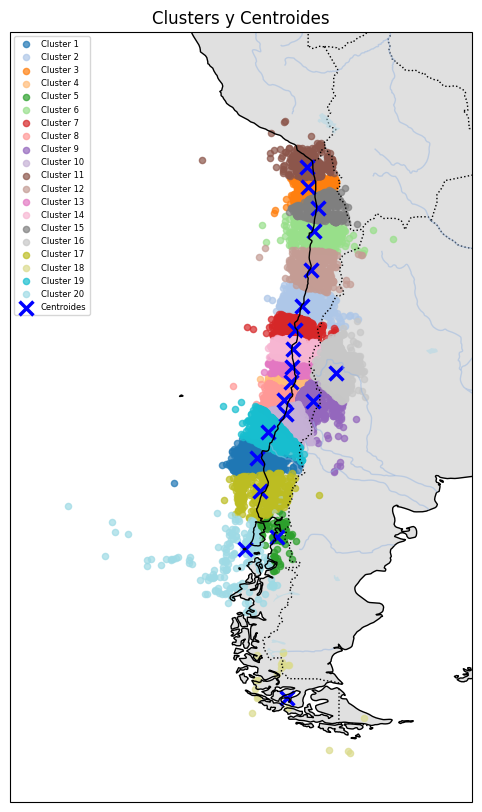

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.cm as cm

# Crear el mapa
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-90, -60, -60, -10], crs=ccrs.PlateCarree())  # Ajustar límites del mapa según tu región

# Agregar características del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.7)
ax.add_feature(cfeature.LAKES, facecolor='lightblue', alpha=0.5)
ax.add_feature(cfeature.RIVERS, alpha=0.5)

# Graficar los puntos de datos según sus etiquetas
unique_labels = np.unique(labels)
# Usar una paleta de colores
cmap = plt.get_cmap("tab20")  # Puedes usar diferentes paletas, por ejemplo, 'viridis', 'tab20', etc.
for idx, cluster_idx in enumerate(unique_labels):
    cluster_points = coordenadas[labels == cluster_idx]
    # Asignar un color único para cada cluster usando el cmap
    color = cmap(idx / len(unique_labels))
    ax.scatter(cluster_points[:, 1], cluster_points[:, 0],  # Intercambiar lat/lon si es necesario
               label=f'Cluster {cluster_idx + 1}', s=20, alpha=0.7, transform=ccrs.PlateCarree(), color=color)

# Dibujar los centroides
lats, lons = centroids[:, 0], centroids[:, 1]
ax.scatter(lons, lats, color='blue', s=100, marker='x', label='Centroides', transform=ccrs.PlateCarree(), linewidths=2.5)

# Agregar leyenda y título
plt.legend(fontsize=6)
plt.title("Clusters y Centroides", fontsize=12)
plt.show()



In [31]:
frame = pd.DataFrame(array_3d)

In [33]:
def train_test_split1(data, train_portion):
    time_len = data.shape[1]
    train_size = int(time_len * train_portion)
    
    train_data = np.array(data.iloc[:, :train_size])
    test_val_data = np.array(data.iloc[:, train_size:])
    
    half_test_val_data = int(len(test_val_data[0]) / 2)
    
    test_data = test_val_data[:, :half_test_val_data]
    val_data = test_val_data[:, half_test_val_data:]
    return train_data, test_data, val_data


In [34]:
train_rate = 0.7
train_data, test_data, val_data  = train_test_split1(frame, train_rate)
print("Train data: ", train_data.shape)
print("Test data: ", test_data.shape)
print("Validation data: ", val_data.shape)

Train data:  (20, 812)
Test data:  (20, 174)
Validation data:  (20, 175)


In [35]:
# def scale_data(train_data, test_data, val_data):
#     max_magn = train_data.max()
#     min_magn = train_data.min()
#     train_scaled = (train_data - 0) / (max_magn - 0) #le cambie la min_magn por 0, para evitar generar más 0's
#     test_scaled = (test_data - 0) / (max_magn - 0)
#     val_scaled = (val_data - 0) / (max_magn - 0)
#     return train_scaled, test_scaled, val_scaled
# train_scaled, test_scaled, val_scaled = scale_data(train_data, test_data, val_data)

In [36]:
seq_len = 1 ## TIME STEPS
pre_len = 2 ## MOMENTO A PREDECIR 

In [37]:
def sequence_data_preparation(seq_len, pre_len, train_data, test_data, val_data):
    trainX, trainY, testX, testY, valX, valY = [], [], [], [], [], []

    for i in range(train_data.shape[1] - int(seq_len + pre_len - 1)):
        a = train_data[:, i : i + seq_len + pre_len]
        trainX.append(a[:, :seq_len])
        trainY.append(a[:, -1])

    for i in range(test_data.shape[1] - int(seq_len + pre_len - 1)):
        b = test_data[:, i : i + seq_len + pre_len]
        testX.append(b[:, :seq_len])
        testY.append(b[:, -1])

    for i in range(val_data.shape[1] - int(seq_len + pre_len - 1)):
        c = val_data[:, i : i + seq_len + pre_len]
        valX.append(c[:, :seq_len])
        valY.append(c[:, -1])

    trainX = np.array(trainX)
    trainY = np.array(trainY)
    testX = np.array(testX)
    testY = np.array(testY)
    valX = np.array(valX)
    valY = np.array(valY)

    return trainX, trainY, testX, testY, valX, valY

In [38]:
trainX, trainY, testX, testY, valX, valY = sequence_data_preparation(
    seq_len, pre_len, train_data, test_data, val_data
)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(810, 20, 1)
(810, 20)
(172, 20, 1)
(172, 20)
(173, 20, 1)
(173, 20)


In [39]:
gcn_lstm = GCN_LSTM(
    seq_len=seq_len,
    adj=matriz_adyacencia,
    gc_layer_sizes=[16, 1],
    gc_activations=["relu", "relu"],
    lstm_layer_sizes=[200, 200],
    lstm_activations=["tanh", "tanh"],
)

C:\Users\alons\AppData\Local\Temp\ipykernel_17420\3209407011.py:1: ExperimentalWarning: GCN_LSTM is experimental: Lack of unit tests and code refinement (see: https://github.com/stellargraph/stellargraph/issues/1132, https://github.com/stellargraph/stellargraph/issues/1526, https://github.com/stellargraph/stellargraph/issues/1564). It may be difficult to use and may have major changes at any time.
  gcn_lstm = GCN_LSTM(


In [40]:
x_input, x_output = gcn_lstm.in_out_tensors()

## CUSTOMIZED LOSS

In [175]:
from tensorflow.keras import backend as K

def weighted_binary_crossentropy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    # Define los pesos
    weight_for_1 = 20.0 ## PESO_PARAMETRO
    weight_for_0 = 1.0
    
    # Calcula la pérdida binaria cruzada básica
    bce = K.binary_crossentropy(y_true, y_pred)
    
    # Crea una máscara para asignar el peso correcto a cada clase
    weight_vector = y_true * weight_for_1 + (1.0 - y_true) * weight_for_0
    
    # Aplica el peso a la pérdida
    weighted_bce = weight_vector * bce
    
    return K.mean(weighted_bce)

In [176]:
# ESTE CODIGO ES PARA AGREGAR CAPAS AL MODELO

# predictions = Dense(units=32, activation="relu")(x_output)
# predictions = Dense(units=32, activation="relu")(predictions)
# predictions = Dense(units=20, activation="sigmoid")(predictions)


In [177]:
model = Model(inputs=x_input, outputs=x_output)
model.compile(optimizer="adam", loss=weighted_binary_crossentropy, metrics=["binary_accuracy"])

In [226]:
def binarize_data(data, threshold):
    binarized_data = np.where(data > threshold, 1, 0)
    return binarized_data

threshold = 5.5 ## THRESHOLD_PARAMETRO
binarized_trainY = binarize_data(trainY, threshold)
binarized_testY = binarize_data(testY, threshold)
binarized_valY = binarize_data(valY, threshold)

In [227]:
np.size(frame)

23220

In [228]:
zeros_count = np.size(frame) - np.count_nonzero(frame!=1)
zeros_count

9746

In [229]:
early_stopping = EarlyStopping(monitor='binary_accuracy', patience=7, restore_best_weights=True)

history = model.fit(
    trainX,
    binarized_trainY,
    epochs=100,
    batch_size=16,
    shuffle=True,
    verbose=1,
    validation_data=(valX, binarized_valY)
    #callbacks=[early_stopping]
)

Epoch 1/100
51/51 [==============================] - 0s 5ms/step - loss: 0.1133 - binary_accuracy: 0.9762 - val_loss: 1.2976 - val_binary_accuracy: 0.9789
Epoch 2/100
51/51 [==============================] - 0s 4ms/step - loss: 0.1001 - binary_accuracy: 0.9801 - val_loss: 1.1853 - val_binary_accuracy: 0.9734
Epoch 3/100
51/51 [==============================] - 0s 4ms/step - loss: 0.0865 - binary_accuracy: 0.9822 - val_loss: 1.3068 - val_binary_accuracy: 0.9780
Epoch 4/100
51/51 [==============================] - 0s 4ms/step - loss: 0.0751 - binary_accuracy: 0.9857 - val_loss: 1.2868 - val_binary_accuracy: 0.9769
Epoch 5/100
51/51 [==============================] - 0s 4ms/step - loss: 0.0814 - binary_accuracy: 0.9817 - val_loss: 1.1907 - val_binary_accuracy: 0.9812
Epoch 6/100
51/51 [==============================] - 0s 4ms/step - loss: 0.0764 - binary_accuracy: 0.9833 - val_loss: 1.2860 - val_binary_accuracy: 0.9818
Epoch 7/100
51/51 [==============================] - 0s 4ms/step - los

In [230]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 20, 1, 1)         0         
                                                                 
 reshape (Reshape)           (None, 20, 1)             0         
                                                                 
 fixed_adjacency_graph_convo  (None, 20, 16)           436       
 lution (FixedAdjacencyGraph                                     
 Convolution)                                                    
                                                                 
 fixed_adjacency_graph_convo  (None, 20, 1)            436       
 lution_1 (FixedAdjacencyGra                                     
 phConvolution)                                            

In [231]:
print(
    "Train loss: ",
    history.history["loss"][-1],
    "\nTest loss:",
    history.history["val_loss"][-1],
)

Train loss:  0.015501420013606548 
Test loss: 1.9520576000213623


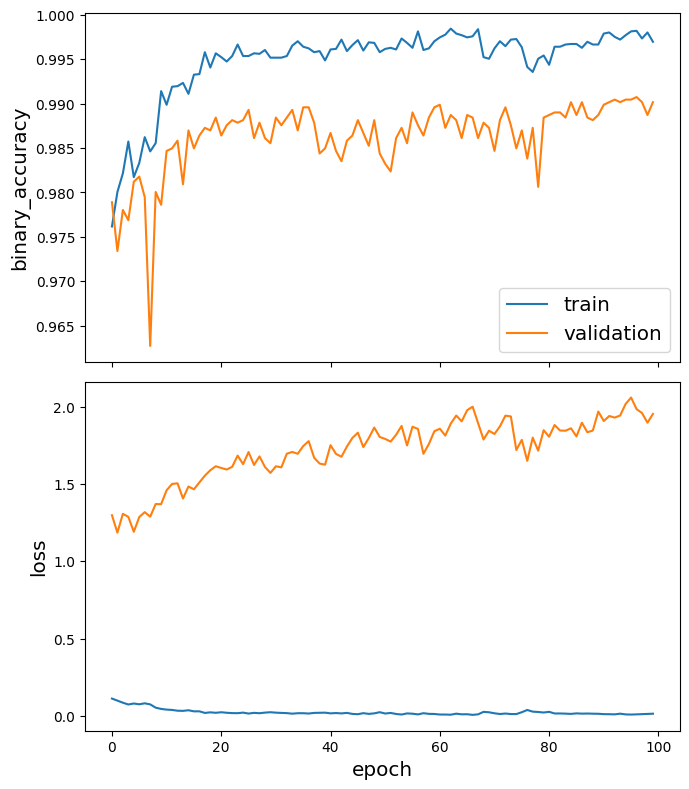

In [232]:
sg.utils.plot_history(history)

In [233]:
yhat = model.predict(testX)

6/6 [==============================] - 0s 2ms/step


In [234]:
yhat_bin = (yhat > 0.5).astype(int)
yhat_bin[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [235]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

yhat_bin = (yhat > 0.5).astype(int)
yhat_bin_flatten = yhat_bin.ravel()
binarized_valY_flatten = binarized_testY.ravel()

accuracy = accuracy_score(binarized_valY_flatten, yhat_bin_flatten)
precision = precision_score(binarized_valY_flatten, yhat_bin_flatten)
recall = recall_score(binarized_valY_flatten, yhat_bin_flatten)
f1 = f1_score(binarized_valY_flatten, yhat_bin_flatten)
conf_matrix = confusion_matrix(binarized_valY_flatten, yhat_bin_flatten)


print(f'Accuracy: {round(accuracy, 4)}')
print(f'Precision: {round(precision, 4)}')
print(f'Recall: {round(recall, 4)}')
print(f'F1-Score: {round(f1, 4)}')
print(f'Matriz de Confusión:\n{conf_matrix}')

report = classification_report(binarized_valY_flatten, yhat_bin_flatten, digits=4)
print(report)


Accuracy: 0.9869
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Matriz de Confusión:
[[3395   14]
 [  31    0]]
              precision    recall  f1-score   support

           0     0.9910    0.9959    0.9934      3409
           1     0.0000    0.0000    0.0000        31

    accuracy                         0.9869      3440
   macro avg     0.4955    0.4979    0.4967      3440
weighted avg     0.9820    0.9869    0.9845      3440



In [236]:
yhat_bin_5 = []
testY_5 = []
for i in range (len(testY)):
    yhat_bin_5.append(yhat_bin[i][5])
    testY_5.append(testY[i][5])

yhat_bin_5 = np.array(yhat_bin_5)
testY_5 = np.array(testY_5)

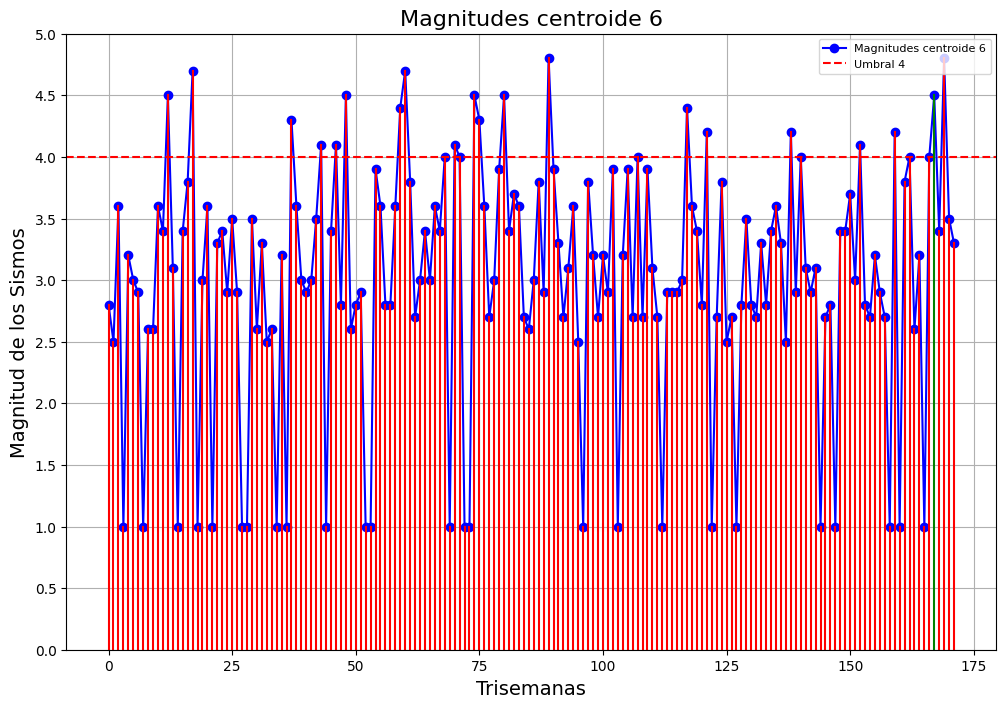

In [237]:
umbral = 4
plt.figure(figsize=(12, 8))
# Graficar las magnitudes más altas por semana usando una línea
plt.plot(range(len(testY_5)), testY_5, marker='o', linestyle='-', color='b', label='Magnitudes centroide 6')

# Agregar la línea del umbral
plt.axhline(y=umbral, color='r', linestyle='--', label=f'Umbral {umbral}')

# Configurar los límites y ticks del eje Y
plt.ylim(0, np.ceil(np.max(testY_5) * 2) / 2)  # Limite superior redondeado hacia arriba a 0.5 más cercano
plt.yticks(np.arange(0, np.ceil(np.max(testY_5) * 2) / 2 + 0.5, 0.5))  # Incrementos de 0.5

# Agregar líneas verticales según las predicciones
for i in range(len(testY_5)):
    # Obtener el índice del sismo más significativo para la semana i
    centroid_index = testY_5[i]

    # Verificar la predicción correspondiente a ese índice
    if yhat_bin_5[i] == 1:  # Si la predicción es 1 (magnitud alta)
        plt.axvline(x=i, ymin=0, ymax=testY_5[i]/(np.ceil(np.max(testY_5) * 2) / 2), color='green', linestyle='-')
    else:  # Si la predicción es 0 (magnitud baja)
        plt.axvline(x=i, ymin=0, ymax=testY_5[i]/(np.ceil(np.max(testY_5) * 2) / 2), color='red', linestyle='-')

    # También podemos agregar etiquetas en la parte superior para mostrar el índice de cada sismo significativo
    #plt.text(i, max_magnitudes[i] + 0.1, str(centroid_index), fontsize=8, ha='center')

# Etiquetas y título
plt.title('Magnitudes centroide 6', fontsize=16)  # Aumentar el tamaño de la fuente del título
plt.xlabel('Trisemanas', fontsize=14)  # Aumentar el tamaño de la fuente del eje X
plt.ylabel('Magnitud de los Sismos', fontsize=14)  # Aumentar el tamaño de la fuente del eje Y
plt.legend(loc='upper right', fontsize=8)  # Aumentar el tamaño de la fuente de la leyenda
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [238]:
centroids

array([[-37.67462284, -73.95886201],
       [-27.76627807, -71.05844633],
       [-20.03870025, -70.63373606],
       [-32.7194476 , -71.75845904],
       [-42.78825714, -72.65809726],
       [-22.93482008, -70.2626427 ],
       [-29.36383951, -71.48492761],
       [-33.87489052, -72.23629217],
       [-33.99191952, -70.29624964],
       [-34.82205137, -72.04763787],
       [-18.74602292, -70.69373992],
       [-25.42716897, -70.46647342],
       [-31.77451387, -71.69712305],
       [-30.59942233, -71.62004563],
       [-21.41736664, -70.01036029],
       [-32.16216825, -68.82526659],
       [-39.79453938, -73.73493462],
       [-53.21608696, -71.99895652],
       [-35.99248278, -73.24682651],
       [-43.54411423, -74.72236891]])

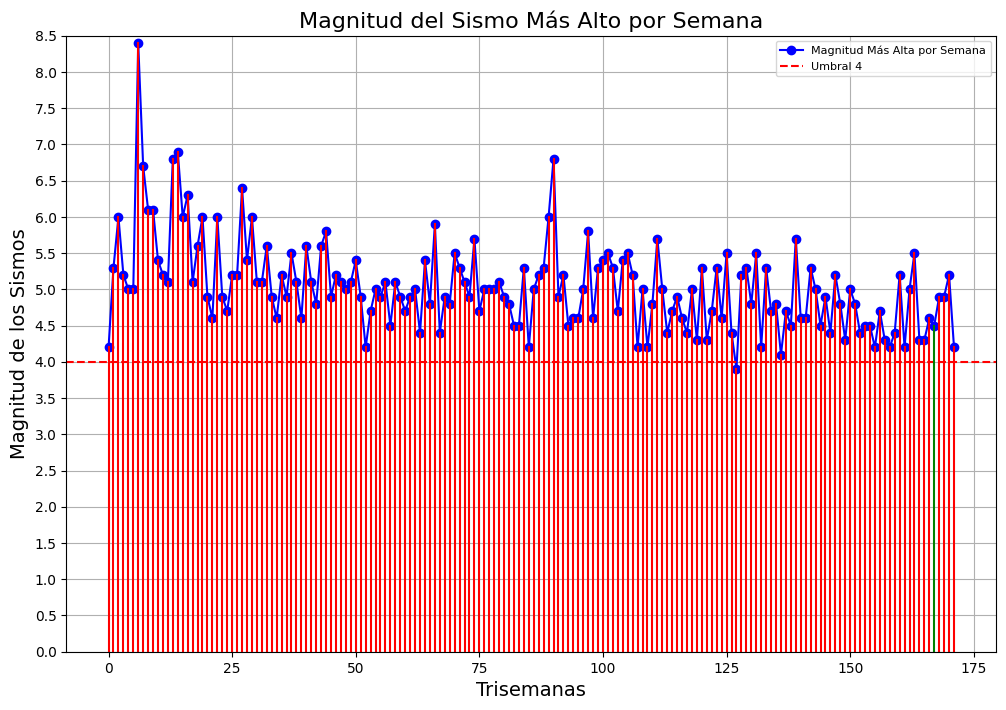

In [239]:
umbral = 4

# Seleccionar la magnitud más alta por semana
max_magnitudes = np.max(testY, axis=1)  # Tomar la magnitud más alta de cada semana
max_indices = np.argmax(testY, axis=1)  # Obtener el índice del sismo más significativo por semana

# Crear el gráfico
plt.figure(figsize=(12, 8))  # Aumentar el tamaño de la figura

# Graficar las magnitudes más altas por semana usando una línea
plt.plot(range(len(max_magnitudes)), max_magnitudes, marker='o', linestyle='-', color='b', label='Magnitud Más Alta por Semana')

# Agregar la línea del umbral
plt.axhline(y=umbral, color='r', linestyle='--', label=f'Umbral {umbral}')

# Configurar los límites y ticks del eje Y
plt.ylim(0, np.ceil(np.max(max_magnitudes) * 2) / 2)  # Limite superior redondeado hacia arriba a 0.5 más cercano
plt.yticks(np.arange(0, np.ceil(np.max(max_magnitudes) * 2) / 2 + 0.5, 0.5))  # Incrementos de 0.5

# Agregar líneas verticales según las predicciones
for i in range(len(max_magnitudes)):
    # Obtener el índice del sismo más significativo para la semana i
    centroid_index = max_indices[i]

    # Verificar la predicción correspondiente a ese índice
    if yhat_bin[i][centroid_index] == 1:  # Si la predicción es 1 (magnitud alta)
        plt.axvline(x=i, ymin=0, ymax=max_magnitudes[i]/(np.ceil(np.max(max_magnitudes) * 2) / 2), color='green', linestyle='-')
    else:  # Si la predicción es 0 (magnitud baja)
        plt.axvline(x=i, ymin=0, ymax=max_magnitudes[i]/(np.ceil(np.max(max_magnitudes) * 2) / 2), color='red', linestyle='-')

    # También podemos agregar etiquetas en la parte superior para mostrar el índice de cada sismo significativo
    #plt.text(i, max_magnitudes[i] + 0.1, str(centroid_index), fontsize=8, ha='center')

# Etiquetas y título
plt.title('Magnitud del Sismo Más Alto por Semana', fontsize=16)  # Aumentar el tamaño de la fuente del título
plt.xlabel('Trisemanas', fontsize=14)  # Aumentar el tamaño de la fuente del eje X
plt.ylabel('Magnitud de los Sismos', fontsize=14)  # Aumentar el tamaño de la fuente del eje Y
plt.legend(loc='upper right', fontsize=8)  # Aumentar el tamaño de la fuente de la leyenda
plt.grid(True)

plt.show()

In [240]:
df.index = pd.to_datetime(df.index)

df['lunes'] = df.index - pd.to_timedelta(df.index.weekday, unit='D')

df['semana_unica'] = ((df['lunes'] - pd.Timestamp('2000-01-03')) // pd.Timedelta('7D')) + 1

semana_unica_count = df['semana_unica'].nunique()
print(f'Número de semanas únicas: {semana_unica_count}')

print(f'Semanas únicas: {sorted(df["semana_unica"].unique())[:10]} ... {sorted(df["semana_unica"].unique())[-10:]}')

def obtener_datos_por_semana(numero_semana):
    if numero_semana in df['semana_unica'].unique():
        semana_deseada = df.groupby('semana_unica').get_group(numero_semana)
        return semana_deseada
    else:
        return f"La semana {numero_semana} no existe en el rango de datos"

numero_semana = 827 # Cambia el número de semana aquí (TOTAL 1160 SEMANAS)

semana_datos = obtener_datos_por_semana(numero_semana)

print(semana_datos)


Número de semanas únicas: 1161
Semanas únicas: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ... [1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160]
                        lat    long     z  magn1         time  \
fecha                                                           
2015-11-02 02:47:41 -30.972 -71.307  56.6    3.4  5784.116447   
2015-11-02 05:29:13 -30.782 -71.442  48.5    3.8  5784.228623   
2015-11-02 05:41:59 -31.927 -71.649  31.1    3.3  5784.237488   
2015-11-02 09:36:11 -31.599 -71.625  25.1    3.2  5784.400127   
2015-11-02 09:36:53 -32.085 -71.498  44.3    3.3  5784.400613   
...                     ...     ...   ...    ...          ...   
2015-11-08 20:41:27 -22.416 -69.506  70.0    3.1  5790.862118   
2015-11-08 21:34:02 -31.810 -71.933  33.4    3.4  5790.898634   
2015-11-08 21:42:28 -31.801 -72.215  11.2    4.2  5790.904491   
2015-11-08 22:07:20 -19.832 -70.972  29.9    4.1  5790.921759   
2015-11-08 22:48:16 -30.522 -71.414  60.6    3.5  5790.950185   

           

In [241]:
semana_datos['magn1'].max()

6.8